https://lucindaliu41.medium.com/exploratory-data-analysis-wish-ecommerce-8bf4e9448389


1. How is each variable affecting the units sold?
Variables to consider: 
*  Retail price 
*  Use of ad boost
*  Rating of merchants and number of ratings

2. Does the number of tags increase its exposure/sales?
3. What kind of merchants may gain the most success?


Shape and structure of your data. 
1. What dimensions/variables does it contain and how are the data values distributed? 
2. Are there any notable data quality issues? Find out if there are missing values in the data and think of how you can handle them. 
3. Are there any surprising relationships between the dimensions/variables?



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
maindata = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
cats = pd.read_csv('unique-categories.csv')
sorted_cats = pd.read_csv('unique-categories.sorted-by-count.csv')

In [ ]:
#Data cleaning
maindata.columns

#remove duplicates
dupes=maindata.duplicated()
sum(dupes)
drop_dupes = maindata.drop_duplicates()

maindata.isnull().sum()



title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

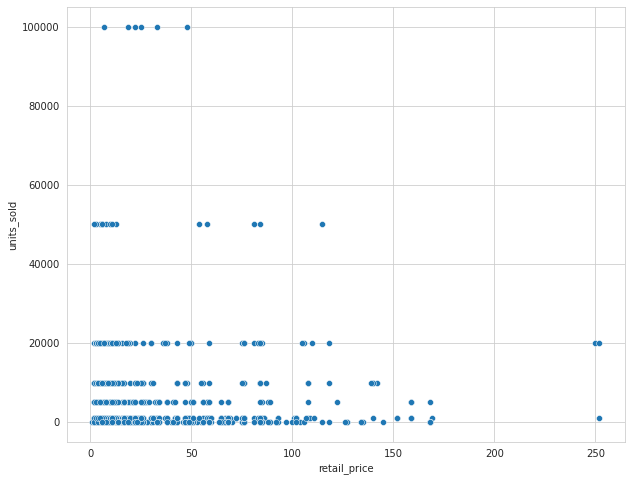

                                                  title  ... uses_ads
0     2020 Summer Vintage Flamingo Print  Pajamas Se...  ...       no
1     SSHOUSE Summer Casual Sleeveless Soirée Party ...  ...      yes
2     2020 Nouvelle Arrivée Femmes Printemps et Été ...  ...       no
3     Hot Summer Cool T-shirt pour les femmes Mode T...  ...      yes
4     Femmes Shorts d'été à lacets taille élastique ...  ...      yes
...                                                 ...  ...      ...
1568  Nouvelle Mode Femmes Bohême Pissenlit Imprimer...  ...      yes
1569  10 couleurs femmes shorts d'été lacent ceintur...  ...      yes
1570  Nouveautés Hommes Siwmwear Beach-Shorts Hommes...  ...       no
1571  Mode femmes d'été sans manches robes col en V ...  ...       no
1572  Pantalon de yoga pour femmes à la mode Slim Fi...  ...      yes

[1573 rows x 45 columns]


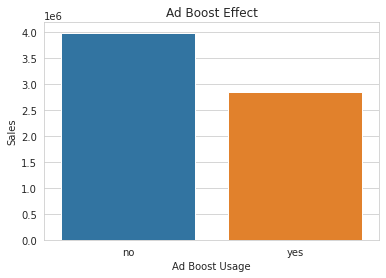

In [ ]:
# Data analysis
# Retail price,Use of ad boost,Rating of merchants and number of ratings
plt.figure(figsize=(10,8))
sb.scatterplot(data=maindata, x="retail_price",y="units_sold")
plt.show()

#ad boosts and effect on sales
wish = pd.DataFrame(maindata,columns = ['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'])

wish["sales"] = wish['units_sold']*wish['retail_price']
wish['uses_ads'] = wish['uses_ad_boosts'].map({True: 'yes', False: 'no'})
print(wish)

ad_sale=wish.groupby('uses_ads')['units_sold'].sum()
ad_sale=ad_sale.reset_index().sort_values(by='units_sold',ascending=False)
ad_sale


sb.barplot (x= 'uses_ads', y= 'units_sold', data= ad_sale)
plt.xlabel('Ad Boost Usage')
plt.ylabel('Sales')
plt.title('Ad Boost Effect')
plt.show()








(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 11 Text major ticklabel objects>)

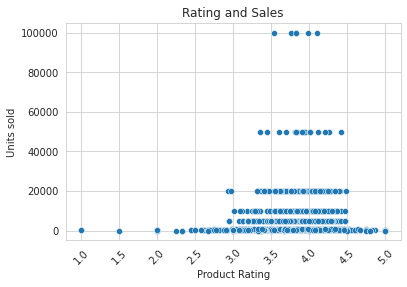

In [ ]:
#rating and sales
plt.figure()
sb.scatterplot(x='rating' , y='units_sold', data=wish)
plt.xlabel('Product Rating')
plt.ylabel("Units sold")
plt.title('Rating and Sales')
plt.xticks(rotation=45)
#rating iincrease, sale unit increases too. However, there can be exceptions


Text(0.5, 1.0, 'Quality badge existence & effect on sales')

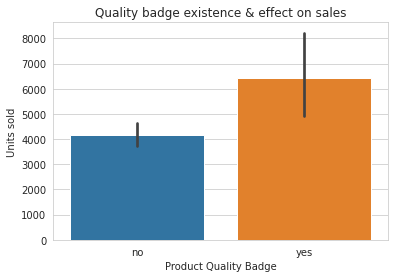

In [ ]:
#product quality badge
wish['quality_badge'] = wish['badge_product_quality'].map({True: 'yes', False: 'no'})
sb.barplot (x= 'quality_badge', y= 'units_sold', data= wish)
plt.xlabel('Product Quality Badge')
plt.ylabel('Units sold')
plt.title('Quality badge existence & effect on sales')


Text(0.5, 1.0, 'Merchant profile picture existence & effect on sales')

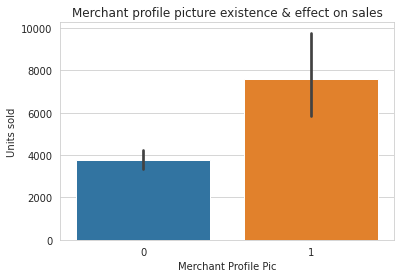

In [ ]:
#merchant profile vs. sales
sb.barplot(x= 'merchant_has_profile_picture', y= 'units_sold', data= wish)
plt.xlabel('Merchant Profile Pic')
plt.ylabel('Units sold')
plt.title('Merchant profile picture existence & effect on sales')

Text(0, 0.5, 'Units sold')

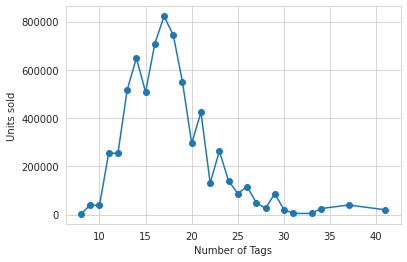

In [ ]:
from collections import Counter

import string
wish['tag_counts'] = wish['tags'].str.split(',').map(len)

tag_sale=wish.groupby('tag_counts')['units_sold'].sum()

tag_sale=tag_sale.reset_index().sort_values(by='tag_counts',ascending=True)
tag_sale

plt.plot(tag_sale.tag_counts,tag_sale.units_sold,marker='o')
plt.xlabel('Number of Tags')
plt.ylabel('Units sold')





